In [157]:
import numpy as np
import ringity as rng
import matplotlib.pyplot as plt

from scipy.integrate import quad
from ringity.classes.network_model import NetworkBuilder

In [128]:
rate = 1.234

N = 2**19
beta = 1-0.123
alpha = 0.24
K = 0.345 + 0.2

rate  = np.tan(np.pi * (1-beta) / 2)

network_builder = NetworkBuilder(random_state = 1234)
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)

In [129]:
def pdf_Theta(t, rate, alpha):
    denom = (1-np.exp(-2*np.pi*rate))
    c_norm = rate / denom
    term = np.exp(-rate*t)
    
    return np.where(t >= 2*np.pi*(1-alpha), c_norm * term, 0)


def pdf_D(t, rate, alpha):
    denom = (1-np.exp(-2*np.pi*rate))
    c_norm = rate / denom
    term = np.exp(-rate*(2*np.pi - t))
    
    return np.where(t <= 2*np.pi*alpha, c_norm * term, 0)


def pdf_S(t, rate, alpha):
    denom = (1-np.exp(-2*np.pi*rate))
    c_norm = 2*np.pi*alpha*rate / denom
    term = np.exp(-rate*2*np.pi*(1-(alpha*(1-t))))
    
    return np.where(t <= 1, c_norm * term, 0)


def pdf_P(t, rate, alpha, K):
    denom = (1-np.exp(-2*np.pi*rate)) * K
    c_norm = 2*np.pi*alpha*rate / denom
    term = np.exp(-rate*2*np.pi*(1-(alpha*(1-t/K))))
    
    return np.where(t <= K, c_norm * term, 0)

In [130]:
Theta = np.where(network_builder.positions >= 2*np.pi*(1-alpha), 
                 network_builder.positions,
                 2*np.pi*(1-alpha))

(0.0, 0.2)

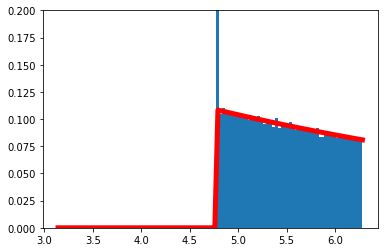

In [131]:
x = np.linspace(np.pi, 2*np.pi, 100)

fig, ax = plt.subplots()

ax.hist(Theta, bins=50, density=True);
ax.plot(x, pdf_Theta(x, rate=rate, alpha=alpha), 'r', linewidth = 5)
ax.set_ylim(0, 0.2)

In [132]:
D = 2*np.pi - Theta

(0.0, 0.2)

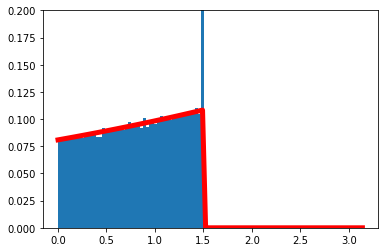

In [133]:
x = np.linspace(0, np.pi, 100)

fig, ax = plt.subplots()

ax.hist(D, bins=50, density=True);
ax.plot(x, pdf_D(x, rate=rate, alpha=alpha), 'r', linewidth = 5)
ax.set_ylim(0, 0.2)

In [134]:
S = 1 - D / (2*np.pi*alpha)

(0.0, 0.4)

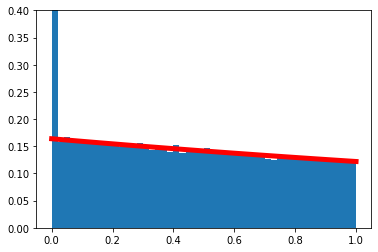

In [135]:
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

ax.hist(S, bins=50, density=True);
ax.plot(x, pdf_S(x, rate=rate, alpha=alpha), 'r', linewidth = 5)
ax.set_ylim(0, 0.4)

In [136]:
P = K*S

(0.0, 0.7)

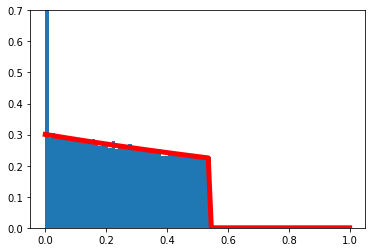

In [137]:
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

ax.hist(P, bins=50, density=True);
ax.plot(x, pdf_P(x, rate=rate, alpha=alpha, K=K), 'r', linewidth = 5)
ax.set_ylim(0, 0.7)

In [162]:
np.mean(P)

0.0366704474878943

In [175]:
A = 2*np.pi*rate

K / (alpha*A) * (1 - np.exp(alpha*A) + A*alpha)/(1 - np.exp(A))

0.03676241783027503

In [176]:
quad(lambda t : t*pdf_P(t, rate=rate, alpha=alpha, K=K),
     0.00, K)[0]

0.036762417830275056

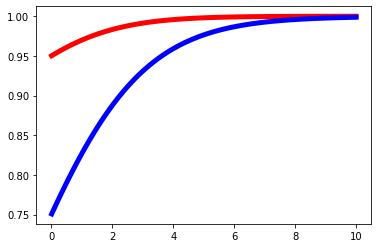

In [186]:
A = np.linspace(0.01, 10, 100)

alpha1 = 0.1
y1 = 1-(1 - np.exp(alpha1*A) + alpha1*A) / (alpha1*A * (1 - np.exp(A)))

alpha2 = 0.5
y2 = 1-(1 - np.exp(alpha2*A) + alpha2*A) / (alpha2*A * (1 - np.exp(A)))

fig, ax = plt.subplots()

ax.plot(A, y1, 'r', linewidth = 5)
ax.plot(A, y2, 'b', linewidth = 5)

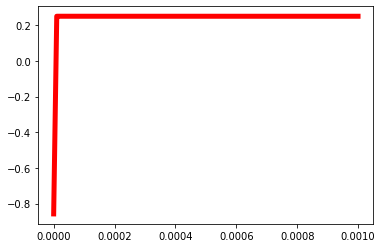

In [200]:
x = np.linspace(0.00000001, 0.001, 100)
y = 2 / (np.exp(x/2) + 1) * (1/x) + (1 / (1 - np.exp(x)))

fig, ax = plt.subplots()

ax.plot(x, y, 'r', linewidth = 5)